In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [52]:
population_estimates = pd.read_csv("Population-EstimatesData.csv")
population_estimates.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Unnamed: 95
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,...,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450,NaN
1,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,...,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418,NaN
2,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,...,40.542064,40.345297,40.162781,39.987572,39.845466,39.699290,39.546177,39.380479,39.197560,NaN
3,Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "Country Name", "Indicator Name", "1970", "2020",
reduced_df = population_estimates[["Country Name", "Indicator Name", "1970", "2020"]]
reduced_df.head()

,Country Name,Indicator Name,1970,2020
0,Arab World,Age dependency ratio (% of working-age populat...,94.226666,61.020120
1,Arab World,"Age dependency ratio, old",7.073558,7.593050
2,Arab World,"Age dependency ratio, young",86.848912,51.954725
3,Arab World,"Age population, age 00, female, interpolated",NaN,NaN
4,Arab World,"Age population, age 00, male, interpolated",NaN,NaN


In [54]:
# Set new index to Country Name
df = reduced_df.set_index("Country Name")
df.head()

,Indicator Name,1970,2020
Country Name,,,
Arab World,Age dependency ratio (% of working-age populat...,94.226666,61.020120
Arab World,"Age dependency ratio, old",7.073558,7.593050
Arab World,"Age dependency ratio, young",86.848912,51.954725
Arab World,"Age population, age 00, female, interpolated",NaN,NaN
Arab World,"Age population, age 00, male, interpolated",NaN,NaN


In [55]:
# Grab the eight regions we'll be using
reduced_df2 = df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
                                "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]
reduced_df2

,Indicator Name,1970,2020
Country Name,,,
Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...
United States,Rural population growth (annual %),1.511424e-01,NaN
United States,Sex ratio at birth (male births per female bir...,NaN,NaN
United States,Urban population,1.509224e+08,2.743740e+08


In [56]:
#Move the Country Name index back into a column
reduced_df3 = reduced_df2.reset_index(level='Country Name')
reduced_df3

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
1,Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
2,Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
3,Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
4,Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...,...
1395,United States,Rural population growth (annual %),1.511424e-01,NaN
1396,United States,Sex ratio at birth (male births per female bir...,NaN,NaN
1397,United States,Urban population,1.509224e+08,2.743740e+08
1398,United States,Urban population (% of total population),7.360200e+01,8.266400e+01


In [57]:
#Makes sure Country Name is now a column
reduced_df3.columns

Index(['Country Name', 'Indicator Name', '1970', '2020'], dtype='object')

In [58]:
# Set new index to Indicator Name
reduced_df4 = reduced_df3.set_index("Indicator Name")
reduced_df4.head()

,Country Name,1970,2020
Indicator Name,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,52.375566,53.162625
"Age dependency ratio, old",Central Europe and the Baltics,14.387453,29.766316
"Age dependency ratio, young",Central Europe and the Baltics,37.922797,23.356127
"Age population, age 00, female, interpolated",Central Europe and the Baltics,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,NaN,NaN


In [59]:
# Grab the two Indicator Names we'll be using
reduced_df5 = reduced_df4.loc[["Rural population (% of total population)", "Urban population (% of total population)"]]
reduced_df5

,Country Name,1970,2020
Indicator Name,,,
Rural population (% of total population),Central Europe and the Baltics,49.219724,37.448709
Rural population (% of total population),East Asia & Pacific,75.047531,39.305147
Rural population (% of total population),European Union,34.327104,23.882072
Rural population (% of total population),Latin America & Caribbean,42.733384,18.931959
Rural population (% of total population),Middle East & North Africa,57.346055,34.031771
Rural population (% of total population),South Asia,81.362281,65.116991
Rural population (% of total population),Sub-Saharan Africa,81.874923,58.747848
Rural population (% of total population),United States,26.398000,17.336000
Urban population (% of total population),Central Europe and the Baltics,50.780276,62.551291


In [60]:
#check the datatypes
reduced_df5.dtypes

Country Name     object
1970            float64
2020            float64
dtype: object

In [61]:
#convert the 1970 column and 2020 column to integers rather than floats
cols = ['1970', '2020']
reduced_df5[cols] = reduced_df5[cols].applymap(np.int64)
reduced_df5

,Country Name,1970,2020
Indicator Name,,,
Rural population (% of total population),Central Europe and the Baltics,49,37
Rural population (% of total population),East Asia & Pacific,75,39
Rural population (% of total population),European Union,34,23
Rural population (% of total population),Latin America & Caribbean,42,18
Rural population (% of total population),Middle East & North Africa,57,34
Rural population (% of total population),South Asia,81,65
Rural population (% of total population),Sub-Saharan Africa,81,58
Rural population (% of total population),United States,26,17
Urban population (% of total population),Central Europe and the Baltics,50,62


In [62]:
#Move the Indicator Name index back into a column
reduced_df6 = reduced_df5.reset_index(level='Indicator Name')
reduced_df6

,Indicator Name,Country Name,1970,2020
0,Rural population (% of total population),Central Europe and the Baltics,49,37
1,Rural population (% of total population),East Asia & Pacific,75,39
2,Rural population (% of total population),European Union,34,23
3,Rural population (% of total population),Latin America & Caribbean,42,18
4,Rural population (% of total population),Middle East & North Africa,57,34
5,Rural population (% of total population),South Asia,81,65
6,Rural population (% of total population),Sub-Saharan Africa,81,58
7,Rural population (% of total population),United States,26,17
8,Urban population (% of total population),Central Europe and the Baltics,50,62
9,Urban population (% of total population),East Asia & Pacific,24,60


In [63]:
# Reorganizing the columns where Country Name comes before Indicator Name
organized_df = reduced_df6[["Country Name","Indicator Name","1970","2020"]]
organized_df.head()

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Rural population (% of total population),49,37
1,East Asia & Pacific,Rural population (% of total population),75,39
2,European Union,Rural population (% of total population),34,23
3,Latin America & Caribbean,Rural population (% of total population),42,18
4,Middle East & North Africa,Rural population (% of total population),57,34


In [64]:
# Push the remade DataFrame to a new CSV file
organized_df.to_csv("Population-Estimates_Emily.csv",
                  index=False, header=True)

In [65]:
# Calculations can also be performed on Series and added into DataFrames as new columns
organized_df["Difference"] = organized_df["2020"]-organized_df["1970"]
organized_df2=organized_df.copy()

C:\Users\akemem02\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
organized_df2

,Country Name,Indicator Name,1970,2020,Difference
0,Central Europe and the Baltics,Rural population (% of total population),49,37,-12
1,East Asia & Pacific,Rural population (% of total population),75,39,-36
2,European Union,Rural population (% of total population),34,23,-11
3,Latin America & Caribbean,Rural population (% of total population),42,18,-24
4,Middle East & North Africa,Rural population (% of total population),57,34,-23
5,South Asia,Rural population (% of total population),81,65,-16
6,Sub-Saharan Africa,Rural population (% of total population),81,58,-23
7,United States,Rural population (% of total population),26,17,-9
8,Central Europe and the Baltics,Urban population (% of total population),50,62,12
9,East Asia & Pacific,Urban population (% of total population),24,60,36


In [70]:
#Sort the Purchase Count column in descending order to see the most purchased items
high_to_low = organized_df2.sort_values("Difference", ascending=False)
high_to_low

,Country Name,Indicator Name,1970,2020,Difference
9,East Asia & Pacific,Urban population (% of total population),24,60,36
11,Latin America & Caribbean,Urban population (% of total population),57,81,24
12,Middle East & North Africa,Urban population (% of total population),42,65,23
14,Sub-Saharan Africa,Urban population (% of total population),18,41,23
13,South Asia,Urban population (% of total population),18,34,16
8,Central Europe and the Baltics,Urban population (% of total population),50,62,12
10,European Union,Urban population (% of total population),65,76,11
15,United States,Urban population (% of total population),73,82,9
7,United States,Rural population (% of total population),26,17,-9
2,European Union,Rural population (% of total population),34,23,-11


In [77]:
# Filter the DataFrame down only to those columns to chart
new_df = high_to_low[["Country Name","Indicator Name", "Difference"]]

new_df

,Country Name,Indicator Name,Difference
9,East Asia & Pacific,Urban population (% of total population),36
11,Latin America & Caribbean,Urban population (% of total population),24
12,Middle East & North Africa,Urban population (% of total population),23
14,Sub-Saharan Africa,Urban population (% of total population),23
13,South Asia,Urban population (% of total population),16
8,Central Europe and the Baltics,Urban population (% of total population),12
10,European Union,Urban population (% of total population),11
15,United States,Urban population (% of total population),9
7,United States,Rural population (% of total population),-9
2,European Union,Rural population (% of total population),-11


In [83]:
# Create a group based on the values in the 'maker' column
indicator_group = new_df.groupby('Indicator Name')
indicator_group

AttributeError: 'Series' object has no attribute 'set_xlabel'

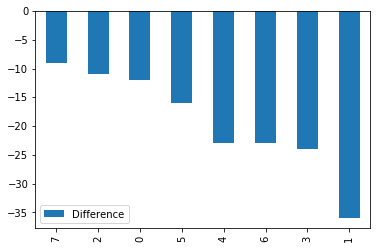

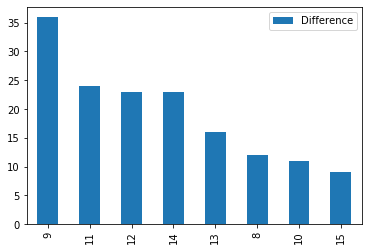

In [85]:
# Create a bar chart based off of the group series from before
count_chart = indicator_group.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country Name")
count_chart.set_ylabel("Difference")


plt.show()
plt.tight_layout()

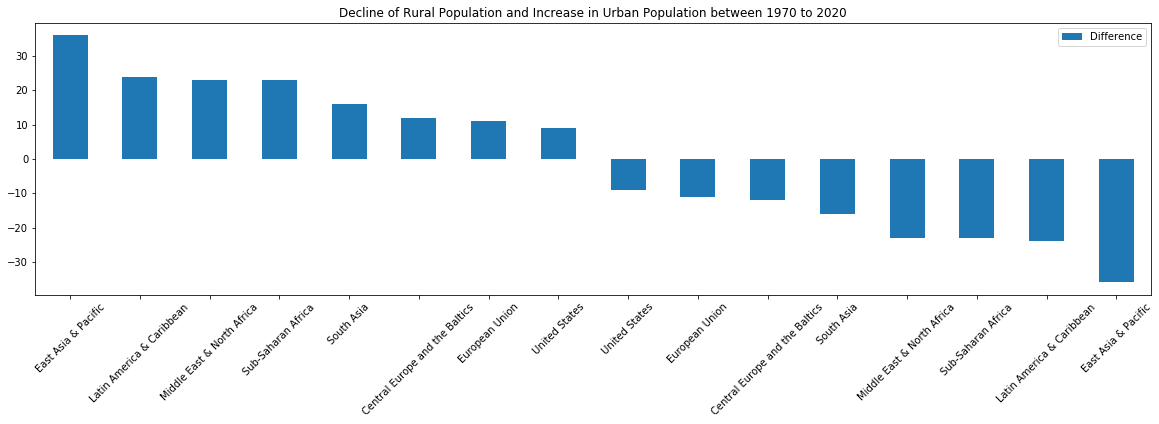

<Figure size 432x288 with 0 Axes>

In [80]:
# Use DataFrame.plot() in order to create a bar chart of the data
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = new_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(new_df["Country Name"], rotation=45)

# Set a title for the chart
plt.title("Decline of Rural Population and Increase in Urban Population between 1970 to 2020")

plt.show()
plt.tight_layout()